In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

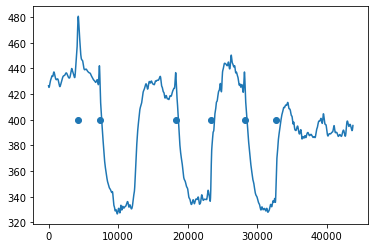

In [11]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('filtered_data.csv')
plt.plot(data)
x = np.sort(np.array([23361, 32703, 7399, 4167, 28243, 18358]))
plt.scatter(x, [400, 400, 400, 400, 400, 400])
plt.show()

array([ 4167,  7399, 18358, 23361, 28243, 32703])

In [1]:
import numpy as np

feature_path = 'gross_features.csv'
name_path = 'gross_name.csv'

In [2]:
def delete_modify(file_path=None, raw_path=None, delete_name=None):
    name_list = np.loadtxt(file_path, dtype=str)
    raw_data = np.loadtxt(raw_path)
    index = np.where(name_list == delete_name)[0]
    if len(index) == 0:
        print('The user name does not exist.')
        return None
    else:
        name_list = np.delete(name_list, index[0], axis=0)
        for _ in range(8):
            raw_data = np.delete(raw_data, index[0] * 8, axis=0)
        column = raw_data.shape[1]
        for idx in range(column - 1, 0, -1):
            if ~np.any(raw_data[:, idx]):
                raw_data = np.delete(raw_data, idx, axis=1)
        np.savetxt(file_path, name_list, fmt='%s')
        np.savetxt(raw_path, raw_data)

In [3]:
def add_modify(file_path=None, raw_path=None, data=None, add_data=None, add_name=None):
    name_list = np.loadtxt(file_path, dtype=str)
    if data is None:
        raw_data = np.loadtxt(raw_path)
    else:
        raw_data = data
    if raw_data.shape[0] == 0:
        result = add_data
    else:
        column = raw_data.shape[1] if raw_data.shape[1] > add_data.shape[1] else add_data.shape[1]
        result = np.zeros((raw_data.shape[0] + add_data.shape[0], column))
        result[0:raw_data.shape[0], 0:raw_data.shape[1]] = raw_data
        result[raw_data.shape[0]:, 0:add_data.shape[1]] = add_data
    if data is None:
        name_list = np.append(name_list, add_name)
        np.savetxt(raw_path, result)
        np.savetxt(file_path, name_list, fmt='%s')
    else:
        return result
def overlap_modify(file_path=None, raw_path=None, add_data=None, selected_name=None):
    name_list = np.loadtxt(file_path, dtype=str)
    raw_data = np.loadtxt(raw_path)
    index = np.where(name_list == selected_name)[0]
    if len(index) == 0:
        print('The user name does not exist.')
        return None
    else:
        fore_part = raw_data[0:index[0] * 8, :]
        end_part = raw_data[index[0] * 8 + 8:, :]

        fore_part = add_modify(file_path=name_path, raw_path=feature_path, data=fore_part, add_data=add_data)
        fore_part = add_modify(file_path=name_path, raw_path=feature_path, data=fore_part, add_data=end_part)

        column = fore_part.shape[1]
        for idx in range(column - 1, 0, -1):
            if ~np.any(fore_part[:, idx]):
                fore_part = np.delete(fore_part, idx, axis=1)
        np.savetxt(raw_path, fore_part)

In [4]:
data_1 = np.random.randint(1, 20, (8, 10))
data_2 = np.random.randint(1, 20, (8, 7))
data_3 = np.random.randint(1, 20, (8, 5))
add_modify(file_path=name_path, raw_path=feature_path, data=None, add_data=data_3, add_name='Mike')
add_modify(file_path=name_path, raw_path=feature_path, data=None, add_data=data_1, add_name='Bob')
add_modify(file_path=name_path, raw_path=feature_path, data=None, add_data=data_2, add_name='Sally')

<ipython-input-3-8494170fdb6d>:2: UserWarning: loadtxt: Empty input file: "gross_name.csv"
  name_list = np.loadtxt(file_path, dtype=str)
<ipython-input-3-8494170fdb6d>:4: UserWarning: loadtxt: Empty input file: "gross_features.csv"
  raw_data = np.loadtxt(raw_path)


In [5]:
delete_modify(file_path=name_path, raw_path=feature_path, delete_name='Bob')

In [6]:
delete_modify(file_path=name_path, raw_path=feature_path, delete_name='Sally')

In [7]:
data_4 = np.random.randint(1, 20, (8, 15))
overlap_modify(file_path=name_path, raw_path=feature_path, add_data=data_4, selected_name='Mike')